In [81]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib import cm
import matplotlib
import numpy as np
from collections import Counter
from paired_connectivity_analyzer import EEGPairedPermutationAnalyser, DrawEEG
from plotting_utils import plot_compute_sign_differences, draw_edges_by_dict, plot_reproducibility_pattern, plot_reproducibility_by_frequency

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
df = pd.read_csv('eeg_dataframe_nansfilled.csv', index_col=0)
analyzer = EEGPairedPermutationAnalyser(data_df=df, num_perm=5000, thres=0.05)

In [25]:
cmap=cm.seismic
vmin_=-1.5
vmax_=1.5

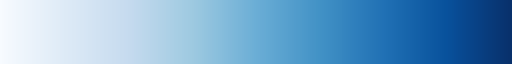

In [121]:
cm.Blues

In [109]:
0.05/171

0.00029239766081871346

100%|███████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:10<00:00,  4.93it/s]


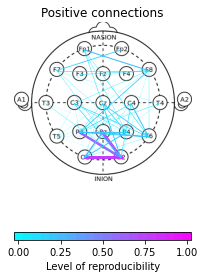

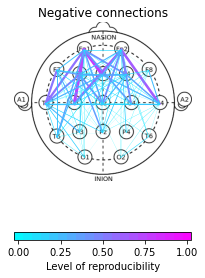

In [115]:
pattern, (fig1, fig2)  = plot_reproducibility_by_frequency(size=30, band=1, num_reps=50, num_perms=1000, thres=0.05,
                                      factor=0.01, replace=False,
                                      cmap=cm.cool, figsize=(5, 4), is_param=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.76it/s]


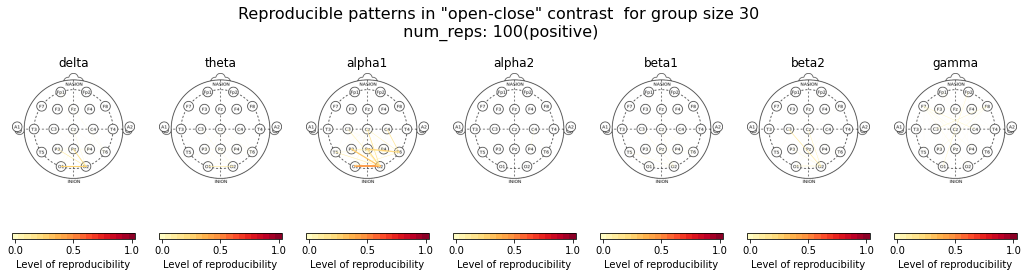

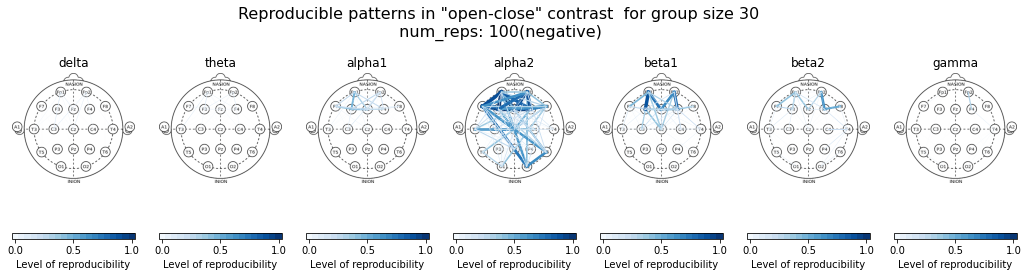

In [124]:
size=30
thres=0.001
pattern, (fig1, fig2) = plot_reproducibility_by_frequency(size=size, band=[1,2,3,4,5,6,7], num_reps=100, num_perms=1000, thres=thres,
                                      factor=0.01, replace=False,
                                      cmap=cm.jet, figsize=(18, 4), is_param=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.76it/s]


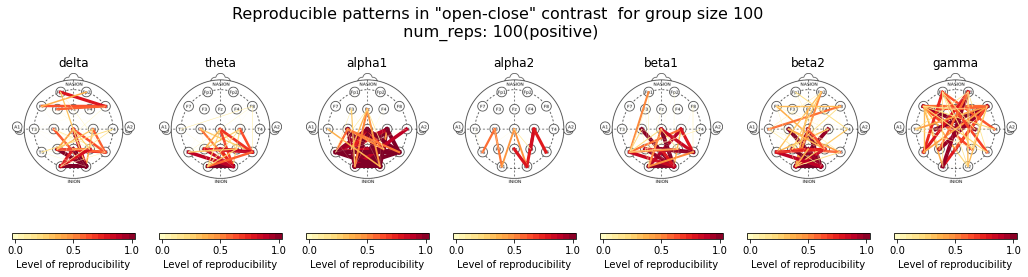

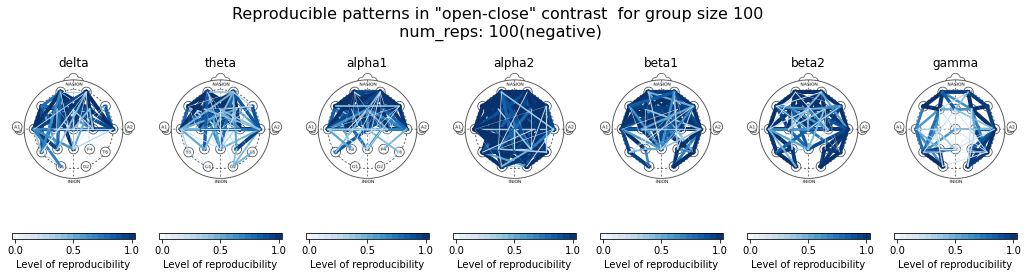

In [125]:
size=100
thres=0.05
pattern, (fig1, fig2) = plot_reproducibility_by_frequency(size=size, band=[1,2,3,4,5,6,7], num_reps=100, num_perms=1000, thres=thres,
                                      factor=0.01, replace=False,
                                      cmap=cm.jet, figsize=(18, 4), is_param=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.52it/s]


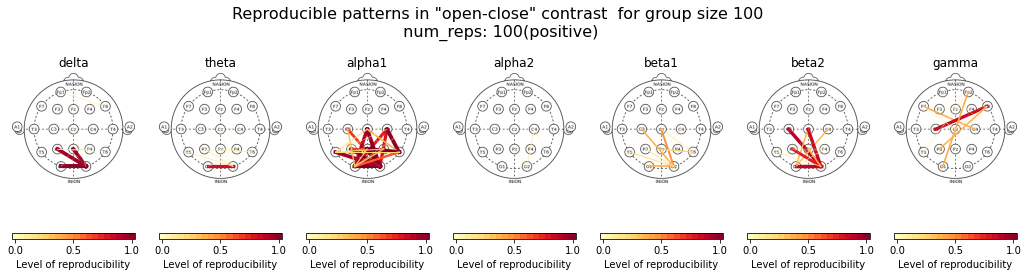

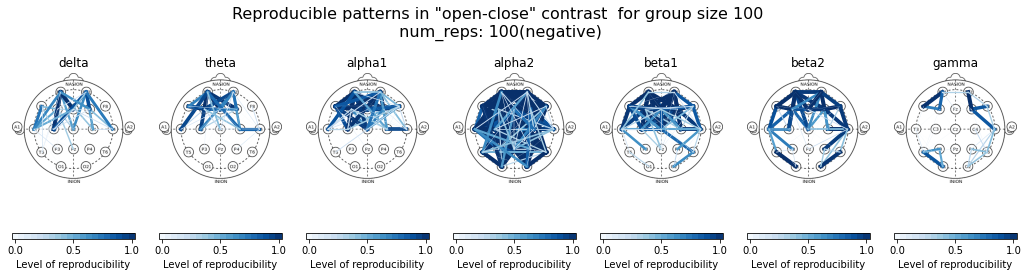

In [126]:
size=100
thres=0.001
pattern, (fig1, fig2) = plot_reproducibility_by_frequency(size=size, band=[1,2,3,4,5,6,7], num_reps=100, num_perms=1000, thres=thres,
                                      factor=0.01, replace=False,
                                      cmap=cm.jet, figsize=(18, 4), is_param=True)

In [113]:
fig1.savefig(f'positive{size}_thr_{thres}.png', dpi=300) 
fig2.savefig(f'positive{size}_thr_{thres}.png', dpi=300) 

In [75]:
%%time
band = 2
num_reps = 50
factor = 0.05
dict_reproducible = analyzer.compute_reproducible_pattern(size=70, num_reps=num_reps, factor=factor, band=band, 
                                                          is_param=False, replace=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.67it/s]

CPU times: user 13.4 s, sys: 290 ms, total: 13.7 s
Wall time: 13.6 s


In [45]:
%%time
band = 2
num_reps = 50
factor = 0.5
dict_reproducible = analyzer.compute_reproducible_pattern(size=70, num_reps=num_reps, factor=factor, band=band, 
                                                          is_param=True, replace=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:08<00:00,  5.77it/s]

CPU times: user 8.55 s, sys: 430 ms, total: 8.98 s
Wall time: 8.67 s


In [56]:
dict_reproducible.keys()

dict_keys(['channels', 'frequency', 'mean_diff'])

In [69]:
dict_reproducible['frequency']

array([0.96, 0.64, 0.8 , 0.68, 0.88, 1.  , 0.94, 1.  , 1.  , 0.94, 1.  ,
       1.  , 0.86, 1.  , 0.96, 0.88, 0.94, 0.72, 0.92, 0.9 , 0.9 , 0.86,
       0.72, 1.  , 0.7 , 0.52, 0.74, 0.6 , 0.6 , 0.78, 0.76, 0.72, 0.54,
       0.58, 0.66, 0.66, 0.58, 0.58, 0.6 , 0.76, 0.6 , 0.7 , 0.56])

In [63]:
np.array(dict_reproducible[key])

array(['C4/T4', 'Cz/T6', 'F3/C4', 'F3/F4', 'F3/Fz', 'F7/F3', 'F7/Fz',
       'Fp1/C3', 'Fp1/C4', 'Fp1/Cz', 'Fp1/F3', 'Fp1/F4', 'Fp1/F7',
       'Fp1/Fz', 'Fp1/T3', 'Fp2/C3', 'Fp2/C4', 'Fp2/Cz', 'Fp2/F3',
       'Fp2/F4', 'Fp2/Fz', 'Fz/F4', 'Fz/T3', 'O1/O2', 'P3/O2', 'Pz/O2',
       'Pz/T6', 'T5/O2', 'C3/T4', 'F3/C3', 'F3/T3', 'F4/C3', 'F7/C3',
       'F7/F4', 'F8/T4', 'Fp1/P3', 'Fp2/Pz', 'Fp2/T4', 'Cz/T4', 'F3/Cz',
       'F7/T3', 'T4/P4', 'P3/T6'], dtype='<U6')

In [76]:
pos_dict = {}
pos_ = np.array(dict_reproducible["mean_diff"])>=0
neg_dict = {}
neg_ = np.array(dict_reproducible["mean_diff"])<0
for key in dict_reproducible.keys():
    pos_dict[key] = np.array(dict_reproducible[key])[pos_]
    neg_dict[key] = np.array(dict_reproducible[key])[neg_]

In [77]:
keys=["chan_names", "chan_diffs", "chan_pvals"]
"chan_diffs" in keys

True

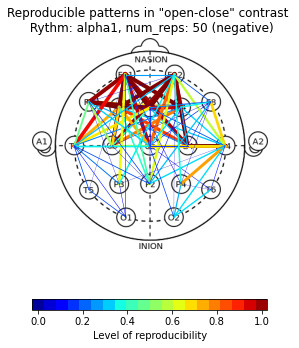

In [78]:
draw_obj = DrawEEG()
title = f"Reproducible patterns in \"open-close\" contrast \n Rythm: {draw_obj.bands[band]}, num_reps: {num_reps} (negative)"
draw_obj = draw_edges_by_dict(neg_dict, 1, keys=["channels", "mean_diff", "frequency"],
                                      cmap=cm.jet, title=title, is_freq = True)


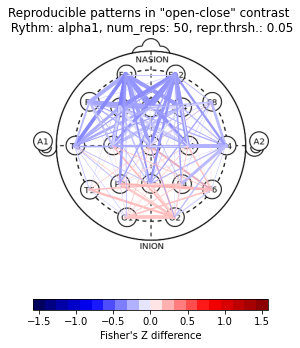

In [79]:
draw_obj = DrawEEG()
title = f"Reproducible patterns in \"open-close\" contrast \n Rythm: {draw_obj.bands[band]}, num_reps: {num_reps}, repr.thrsh.: {factor}"
draw_obj = draw_edges_by_dict(dict_reproducible, 1, keys=["channels", "mean_diff", "frequency"],
                                      cmap=cm.seismic, title=title)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:51<00:00,  1.95it/s]


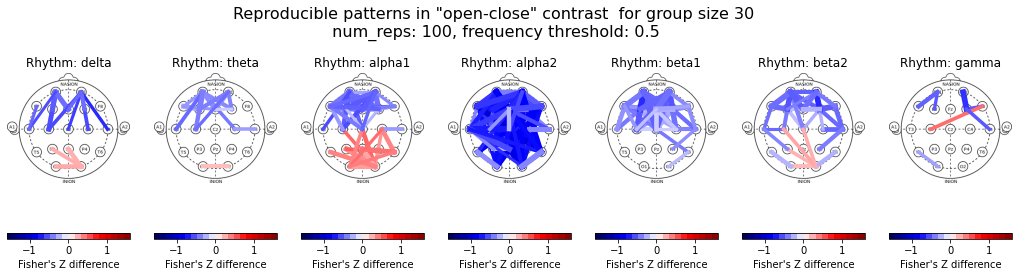

CPU times: user 5min 38s, sys: 7.86 s, total: 5min 46s
Wall time: 5min 46s


In [19]:
%%time
group_size = 30
obj, pattern = plot_reproducibility_pattern(size=group_size, band=[1,2,3,4,5,6,7], num_perms=10000, num_reps=100, factor=0.5,
                                           thres=0.05, cmap=cmap, vmin=vmin_, vmax=vmax_, figsize=(18, 4))

In [20]:
obj

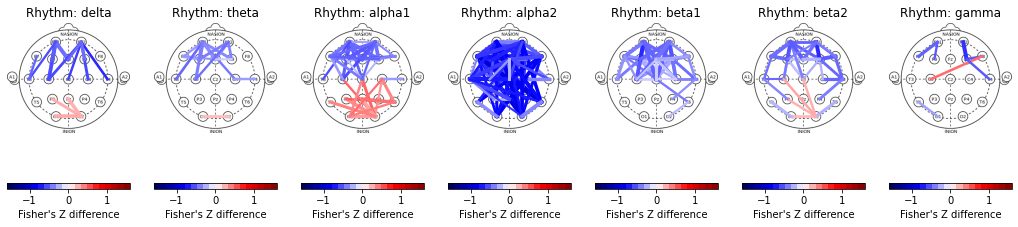

In [32]:
figsize=(18, 4)
band=[1,2,3,4,5,6,7]
fig, axs = plt.subplots(nrows=1, ncols=len(band), figsize=figsize)
title_list = [f"Rhythm: {draw_obj.bands[b_-1]}" for b_ in band]
for i, b in enumerate(band):
    draw_obj = draw_edges_by_dict(pattern[i], b, keys=["channels", "mean_diff", "frequency"],
                                      title=title_list[i], ax=axs[i], cmap=cmap, vmin=vmin_, vmax=vmax_, normalize_width=True)

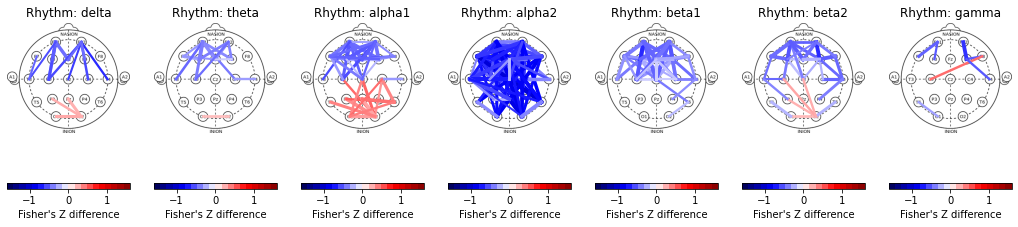

In [39]:
figsize=(18, 4)
band=[1,2,3,4,5,6,7]
fig, axs = plt.subplots(nrows=1, ncols=len(band), figsize=figsize)
title_list = [f"Rhythm: {draw_obj.bands[b_-1]}" for b_ in band]
for i, b in enumerate(band):
    draw_obj = draw_edges_by_dict(pattern[i], b, keys=["channels", "mean_diff", "frequency"],
                                      title=title_list[i], ax=axs[i], cmap=cmap, vmin=vmin_, vmax=vmax_, normalize_width=False)

In [40]:
fig.savefig('test.png', dpi=300) 

In [34]:
pattern[i]

{'channels': ['F4/F8',
  'Fp1/F3',
  'Fp1/F7',
  'Fp2/F4',
  'F8/C3',
  'F4/T4',
  'T5/O1'],
 'frequency': array([0.6 , 0.55, 0.73, 0.95, 0.61, 0.58, 0.57]),
 'mean_diff': [-0.4889348417913234,
  -0.4828746204029306,
  -0.4657691578796304,
  -0.6076067789719773,
  0.4331639261718053,
  -0.49179793139321765,
  -0.27897973726290315]}